What is the impact of a movie’s runtime on its IMDB rating, box office gross, and Metacritic score, and should we adjust the length of our films to optimize performance?

Purpose: Analyzing the relationship between a movie's runtime and its success metrics (IMDb rating, gross revenue, and critical reception) can reveal whether there is an optimal length for films that maximizes audience engagement and profitability.

Impact: If the analysis shows a correlation between shorter or longer runtimes and better outcomes, the studio can adjust its production process and creative decisions to optimize the runtime of future movies, potentially improving overall success.

In [26]:
import os
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans

from PATHS import HOME, DATASET

In [2]:
print('HOME: ', HOME)
print('DATASET: ', DATASET)

HOME:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset
DATASET:  d:\Data Science Programming\External_Projects\Top 1000 IMDB Dataset\data\imdb_top_1000.csv


In [3]:
df = pd.read_csv(DATASET)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
df.keys()

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
df = df[['Runtime', 'IMDB_Rating', 'Meta_score', 'Gross']]
df

,Runtime,IMDB_Rating,Meta_score,Gross
0,142 min,9.3,80.0,"28,341,469"
1,175 min,9.2,100.0,"134,966,411"
2,152 min,9.0,84.0,"534,858,444"
3,202 min,9.0,90.0,"57,300,000"
4,96 min,9.0,96.0,"4,360,000"
...,...,...,...,...
995,115 min,7.6,76.0,NaN
996,201 min,7.6,84.0,NaN
997,118 min,7.6,85.0,"30,500,000"
998,97 min,7.6,78.0,NaN


In [7]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15824\3742973292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())


,Runtime,IMDB_Rating,Meta_score,Gross
0,142 min,9.3,80.0,"28,341,469"
1,175 min,9.2,100.0,"134,966,411"
2,152 min,9.0,84.0,"534,858,444"
3,202 min,9.0,90.0,"57,300,000"
4,96 min,9.0,96.0,"4,360,000"
...,...,...,...,...
995,115 min,7.6,76.0,NaN
996,201 min,7.6,84.0,NaN
997,118 min,7.6,85.0,"30,500,000"
998,97 min,7.6,78.0,NaN


In [8]:
df = df.dropna(subset=['Gross'])
df

,Runtime,IMDB_Rating,Meta_score,Gross
0,142 min,9.3,80.0,"28,341,469"
1,175 min,9.2,100.0,"134,966,411"
2,152 min,9.0,84.0,"534,858,444"
3,202 min,9.0,90.0,"57,300,000"
4,96 min,9.0,96.0,"4,360,000"
...,...,...,...,...
990,157 min,7.6,77.0,"696,690"
991,144 min,7.6,50.0,"1,378,435"
992,78 min,7.6,65.0,"141,843,612"
994,87 min,7.6,96.0,"13,780,024"


In [9]:
df['Runtime'] = df['Runtime'].str.split('min').str[0].astype(int)
df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15824\3636061142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Runtime'] = df['Runtime'].str.split('min').str[0].astype(int)


,Runtime,IMDB_Rating,Meta_score,Gross
0,142,9.3,80.0,"28,341,469"
1,175,9.2,100.0,"134,966,411"
2,152,9.0,84.0,"534,858,444"
3,202,9.0,90.0,"57,300,000"
4,96,9.0,96.0,"4,360,000"
...,...,...,...,...
990,157,7.6,77.0,"696,690"
991,144,7.6,50.0,"1,378,435"
992,78,7.6,65.0,"141,843,612"
994,87,7.6,96.0,"13,780,024"


In [10]:
df['Gross'] = df['Gross'].str.replace(',', '').astype(int)
df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15824\3155822037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'] = df['Gross'].str.replace(',', '').astype(int)


,Runtime,IMDB_Rating,Meta_score,Gross
0,142,9.3,80.0,28341469
1,175,9.2,100.0,134966411
2,152,9.0,84.0,534858444
3,202,9.0,90.0,57300000
4,96,9.0,96.0,4360000
...,...,...,...,...
990,157,7.6,77.0,696690
991,144,7.6,50.0,1378435
992,78,7.6,65.0,141843612
994,87,7.6,96.0,13780024


In [12]:
df.dtypes

Runtime          int64
IMDB_Rating    float64
Meta_score     float64
Gross            int64
dtype: object

Scatter plot for 

Runtime - IMDB_Rating

Runtime - Meta_score

Runtime - Gross

Text(0.5, 1.0, 'Runtime vs Gross')

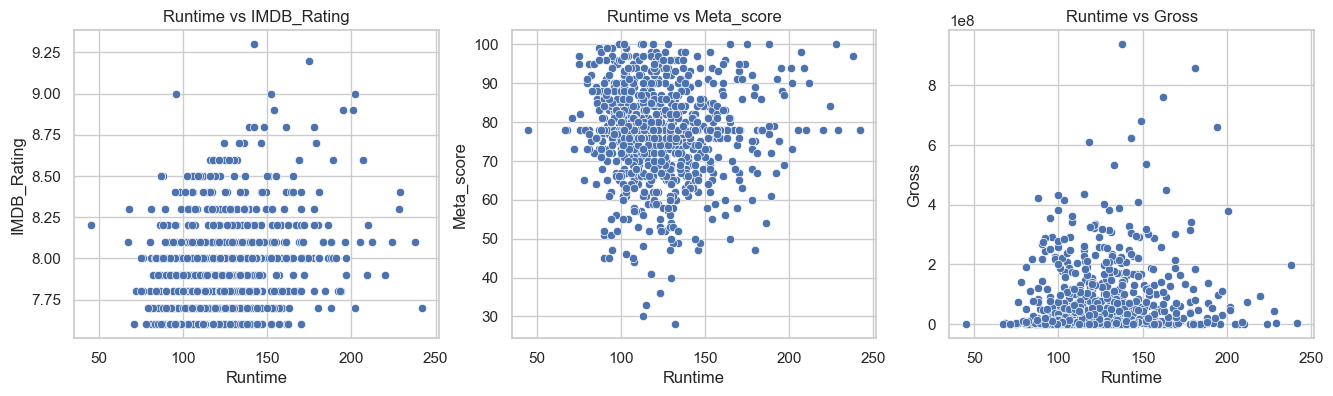

In [20]:
sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Biểu đồ Runtime - IMDB_Rating
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df, ax=axes[0])
axes[0].set_title('Runtime vs IMDB_Rating')

# Biểu đồ Runtime - Meta_score
sns.scatterplot(x='Runtime', y='Meta_score', data=df, ax=axes[1])
axes[1].set_title('Runtime vs Meta_score')

# Biểu đồ Runtime - Gross
sns.scatterplot(x='Runtime', y='Gross', data=df, ax=axes[2])
axes[2].set_title('Runtime vs Gross')

In [21]:
corr_matrix = df.corr()

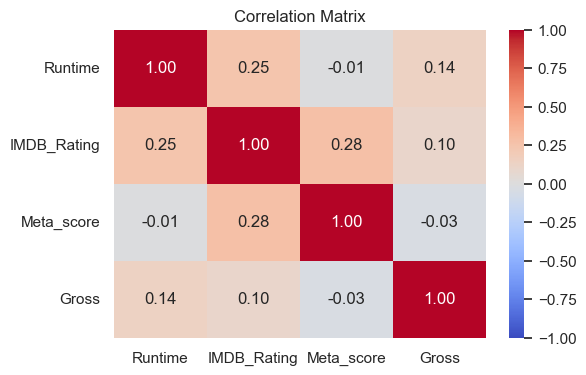

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Apply clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['Runtime', 'IMDB_Rating', 'Meta_score', 'Gross']])

for cluster_num in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_num]
    print(f"Cluster {cluster_num}:")
    print(cluster_data[['Runtime', 'IMDB_Rating', 'Meta_score', 'Gross']].describe())

Cluster 0:
          Runtime  IMDB_Rating  Meta_score         Gross
count  668.000000   668.000000  668.000000  6.680000e+02
mean   122.839820     7.932635   77.682177  2.496957e+07
std     27.703881     0.265871   12.099574  2.932311e+07
min     45.000000     7.600000   28.000000  1.305000e+03
25%    102.750000     7.700000   72.000000  1.999989e+06
50%    119.000000     7.900000   77.971530  1.109306e+07
75%    136.000000     8.100000   86.000000  4.251998e+07
max    242.000000     9.300000  100.000000  1.120000e+08
Cluster 1:
          Runtime  IMDB_Rating  Meta_score         Gross
count  143.000000   143.000000  143.000000  1.430000e+02
mean   127.769231     7.992308   76.398601  2.039825e+08
std     25.176753     0.330828   11.084274  6.738154e+07
min     78.000000     7.600000   48.000000  1.156462e+08
25%    109.500000     7.700000   69.500000  1.421732e+08
50%    126.000000     8.000000   76.000000  1.894229e+08
75%    142.500000     8.100000   84.500000  2.537367e+08
max    23

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_15824\1193656371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df[['Runtime', 'IMDB_Rating', 'Meta_score', 'Gross']])


In [28]:
# Generate recommendations
high_perf_clusters = df[df['Cluster'] == 2]
print("Recommended Runtime:")
print(high_perf_clusters[['Runtime', 'IMDB_Rating', 'Meta_score', 'Gross']].describe())

Recommended Runtime:
          Runtime  IMDB_Rating  Meta_score         Gross
count   20.000000    20.000000   20.000000  2.000000e+01
mean   139.050000     8.100000   79.700000  5.343854e+08
std     31.088118     0.396033    9.032689  1.697895e+08
min     88.000000     7.600000   65.000000  3.778459e+08
25%    117.250000     7.800000   73.500000  4.066767e+08
50%    137.000000     8.050000   80.000000  4.416248e+08
75%    154.500000     8.400000   85.750000  6.322910e+08
max    201.000000     9.000000   94.000000  9.366622e+08


Bộ phim nên có thời lượng từ 137-155 phút